In [ ]:
!pip install pandas_ta

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import tensorflow as tf

#Loading and preprocessing dataset

In [ ]:
#loading dataset
df = pd.read_csv("btc_5m.csv")
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135
...,...,...,...,...,...,...
427809,2022-01-31 05:10:00,37950.55,37979.31,37875.58,37959.87,119.164080
427810,2022-01-31 05:15:00,37959.87,37959.88,37876.94,37896.41,73.051970
427811,2022-01-31 05:20:00,37896.41,37948.79,37870.00,37928.03,41.395230
427812,2022-01-31 05:25:00,37928.04,37945.25,37870.00,37881.76,57.851440


In [ ]:
df.describe()

,open,high,low,close,volume
count,427814.000000,427814.000000,427814.000000,427814.000000,427814.000000
mean,18807.284018,18838.767082,18775.032703,18807.335374,189.650301
std,17870.528048,17900.988510,17839.805009,17870.553473,241.061252
min,3162.100000,3166.430000,3156.260000,3163.850000,0.000000
25%,7134.992500,7143.565000,7125.822500,7134.992500,73.498988
50%,9532.105000,9544.680000,9520.010000,9532.210000,123.611109
75%,32659.472500,32740.717500,32585.965000,32659.970000,215.285150
max,68734.260000,69000.000000,68581.000000,68734.260000,8277.172300


In [ ]:
df.info()
#No nunll values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427814 entries, 0 to 427813
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  427814 non-null  object 
 1   open      427814 non-null  float64
 2   high      427814 non-null  float64
 3   low       427814 non-null  float64
 4   close     427814 non-null  float64
 5   volume    427814 non-null  float64
dtypes: float64(5), object(1)
memory usage: 19.6+ MB


In [ ]:
#copying the closing time into a separate dataframe
df2=pd.DataFrame()
df2[["datetime", "close","open"]] = df[["datetime", "close","open"]]
df2

,datetime,close,open
0,2018-01-01 05:30:00,13600.00,13715.65
1,2018-01-01 05:35:00,13554.58,13600.00
2,2018-01-01 05:40:00,13556.15,13554.58
3,2018-01-01 05:45:00,13430.52,13533.75
4,2018-01-01 05:50:00,13439.94,13440.01
...,...,...,...
427809,2022-01-31 05:10:00,37959.87,37950.55
427810,2022-01-31 05:15:00,37896.41,37959.87
427811,2022-01-31 05:20:00,37928.03,37896.41
427812,2022-01-31 05:25:00,37881.76,37928.04


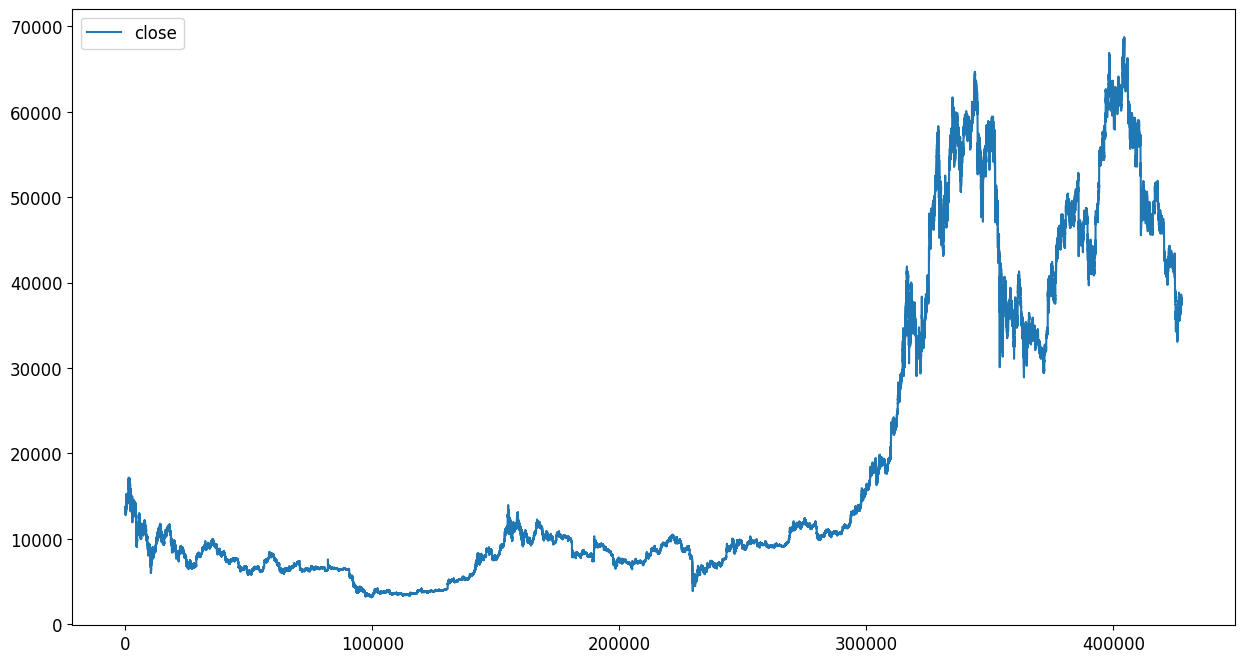

In [ ]:
df2["close"].plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
nrml = df2["close"].iloc[0]
nrml

13600.0

In [ ]:
#normalizing closing values
normclose = df2.close.div(nrml).mul(100)
normclose

0         100.000000
1          99.666029
2          99.677574
3          98.753824
4          98.823088
             ...    
427809    279.116691
427810    278.650074
427811    278.882574
427812    278.542353
427813    278.475441
Name: close, Length: 427814, dtype: float64

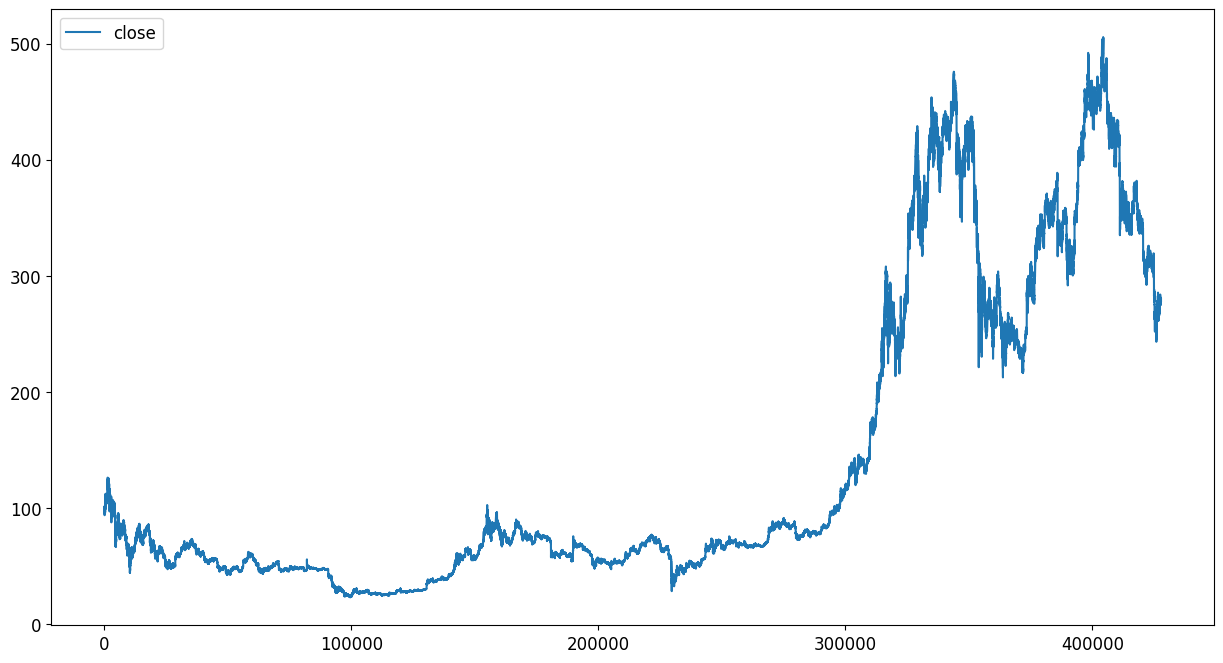

In [ ]:
normclose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
#difference between closing price in successive time intervals
df2["Diff"] = df2.close.diff(periods=1)
df2

,datetime,close,open,Diff
0,2018-01-01 05:30:00,13600.00,13715.65,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42
2,2018-01-01 05:40:00,13556.15,13554.58,1.57
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63
4,2018-01-01 05:50:00,13439.94,13440.01,9.42
...,...,...,...,...
427809,2022-01-31 05:10:00,37959.87,37950.55,9.29
427810,2022-01-31 05:15:00,37896.41,37959.87,-63.46
427811,2022-01-31 05:20:00,37928.03,37896.41,31.62
427812,2022-01-31 05:25:00,37881.76,37928.04,-46.27


In [ ]:
#percentage change over time frame
df2["%change"] = df2.close.pct_change(periods=1).mul(100)
df2

,datetime,close,open,Diff,%change
0,2018-01-01 05:30:00,13600.00,13715.65,NaN,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42,-0.333971
2,2018-01-01 05:40:00,13556.15,13554.58,1.57,0.011583
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63,-0.926738
4,2018-01-01 05:50:00,13439.94,13440.01,9.42,0.070139
...,...,...,...,...,...
427809,2022-01-31 05:10:00,37959.87,37950.55,9.29,0.024479
427810,2022-01-31 05:15:00,37896.41,37959.87,-63.46,-0.167177
427811,2022-01-31 05:20:00,37928.03,37896.41,31.62,0.083438
427812,2022-01-31 05:25:00,37881.76,37928.04,-46.27,-0.121994


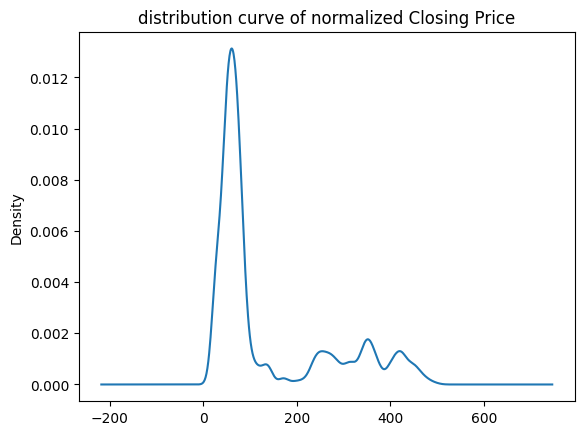

In [ ]:
normclose.plot.kde()
plt.title('Distribution curve of normalized closing price')
plt.show()

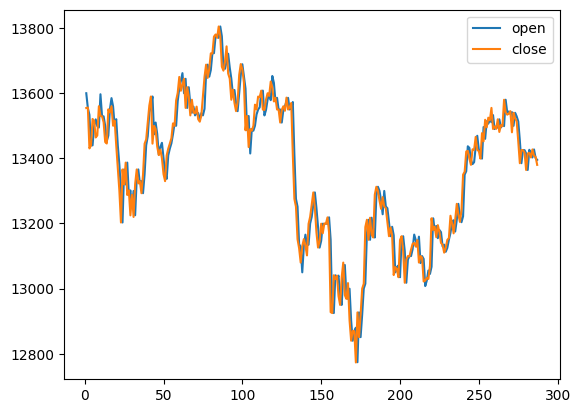

In [ ]:
#graphing open and close of a single day in 5 minute time intervals
df["open"].iloc[1:288].plot()
df["close"].iloc[1:288].plot()
plt.legend()

In [ ]:
#plt.figure(figsize=(15,8))
df3 = df[["datetime","close"]].copy()
df3.set_index("datetime")
df3["datetime"].loc[2]

'2018-01-01 05:40:00'

In [ ]:
# Adding indicators
df2['RSI']=ta.rsi(df2.close, length=15)
df2['EMAF']=ta.ema(df2.close, length=288)
df2['EMAM']=ta.ema(df2.close, length=100)
df2['EMAS']=ta.ema(df2.close, length=150)
df2['Adj_close'] = df2['close'].shift(1)
df2

,datetime,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close
0,2018-01-01 05:30:00,13600.00,13715.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 05:35:00,13554.58,13600.00,-45.42,-0.333971,NaN,NaN,NaN,NaN,13600.00
2,2018-01-01 05:40:00,13556.15,13554.58,1.57,0.011583,NaN,NaN,NaN,NaN,13554.58
3,2018-01-01 05:45:00,13430.52,13533.75,-125.63,-0.926738,NaN,NaN,NaN,NaN,13556.15
4,2018-01-01 05:50:00,13439.94,13440.01,9.42,0.070139,NaN,NaN,NaN,NaN,13430.52
...,...,...,...,...,...,...,...,...,...,...
427809,2022-01-31 05:10:00,37959.87,37950.55,9.29,0.024479,56.949809,37864.254334,37807.148787,37835.447133,37950.58
427810,2022-01-31 05:15:00,37896.41,37959.87,-63.46,-0.167177,52.664532,37864.476864,37808.916336,37836.254588,37959.87
427811,2022-01-31 05:20:00,37928.03,37896.41,31.62,0.083438,54.492605,37864.916678,37811.275022,37837.470156,37896.41
427812,2022-01-31 05:25:00,37881.76,37928.04,-46.27,-0.121994,51.381501,37865.033241,37812.670765,37838.056777,37928.03


In [ ]:
df2['Target'] = df2['Adj_close']-df2['open']
df2['Target'] = df2['Target'].shift(-1)

df2['buy/sell'] = [1 if df2.Target[i]>0 else 0 for i in range(len(df2))]

df2['TargetNextClose'] = df2['Adj_close'].shift(-1)

df2.dropna(inplace=True)
df2.reset_index(inplace = True)

In [ ]:
dfbuff=pd.DataFrame(df2)

In [ ]:
df2

,index,datetime,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close,Target,buy/sell,TargetNextClose
0,287,2018-01-02 05:25:00,13380.00,13395.32,-24.52,-0.182923,42.815597,13364.753090,13351.998498,13340.074775,13404.52,-2.16,0,13380.00
1,288,2018-01-02 05:30:00,13500.00,13382.16,120.00,0.896861,56.460779,13365.689055,13354.929220,13342.192990,13380.00,0.00,0,13500.00
2,289,2018-01-02 05:35:00,13516.09,13500.00,16.09,0.119185,57.903832,13366.729892,13358.120523,13344.496262,13500.00,-11.28,0,13516.09
3,290,2018-01-02 05:40:00,13490.42,13527.37,-25.67,-0.189922,54.799208,13367.585879,13360.740315,13346.429026,13516.09,10.41,1,13490.42
4,291,2018-01-02 05:45:00,13540.00,13480.01,49.58,0.367520,59.313559,13368.779056,13364.290011,13348.992880,13490.42,-1.71,0,13540.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427521,427808,2022-01-31 05:05:00,37950.58,38040.60,-90.01,-0.236616,56.465811,37863.588022,37804.063510,37833.777027,38040.59,0.03,1,37950.58
427522,427809,2022-01-31 05:10:00,37959.87,37950.55,9.29,0.024479,56.949809,37864.254334,37807.148787,37835.447133,37950.58,0.00,0,37959.87
427523,427810,2022-01-31 05:15:00,37896.41,37959.87,-63.46,-0.167177,52.664532,37864.476864,37808.916336,37836.254588,37959.87,0.00,0,37896.41
427524,427811,2022-01-31 05:20:00,37928.03,37896.41,31.62,0.083438,54.492605,37864.916678,37811.275022,37837.470156,37896.41,-0.01,0,37928.03


In [ ]:
df2.drop([ 'index','datetime'], axis=1, inplace=True)


#Model fitting and training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df2)
print(df2)

           close      open    Diff   %change        RSI          EMAF  \
0       13380.00  13395.32  -24.52 -0.182923  42.815597  13364.753090   
1       13500.00  13382.16  120.00  0.896861  56.460779  13365.689055   
2       13516.09  13500.00   16.09  0.119185  57.903832  13366.729892   
3       13490.42  13527.37  -25.67 -0.189922  54.799208  13367.585879   
4       13540.00  13480.01   49.58  0.367520  59.313559  13368.779056   
...          ...       ...     ...       ...        ...           ...   
427521  37950.58  38040.60  -90.01 -0.236616  56.465811  37863.588022   
427522  37959.87  37950.55    9.29  0.024479  56.949809  37864.254334   
427523  37896.41  37959.87  -63.46 -0.167177  52.664532  37864.476864   
427524  37928.03  37896.41   31.62  0.083438  54.492605  37864.916678   
427525  37881.76  37928.04  -46.27 -0.121994  51.381501  37865.033241   

                EMAM          EMAS  Adj_close  Target  buy/sell  \
0       13351.998498  13340.074775   13404.52   -2.16   

In [ ]:
len(data_set_scaled)

427526

In [ ]:
X = []

#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))


print(X.shape)

print(y.shape)


(427496, 30, 4)
(427496, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

341996
(341996, 30, 4)
(85500, 30, 4)
(341996, 1)
(85500, 1)
[[0.15667616]
 [0.15612759]
 [0.15748247]
 ...
 [0.82715893]
 [0.82702762]
 [0.82597409]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import joblib

In [ ]:
#tf.random.set_seed(20)
np.random.seed(10)
lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()

In [ ]:
#saving the trained model
model_loaded = joblib.load("buysell.joblib")

NameError: name 'joblib' is not defined

In [ ]:
y_pred = model_loaded.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

2672/2672 [==============================] - 55s 20ms/step
[0.8302553] [0.82618211]
[0.8301873] [0.8278417]
[0.8315534] [0.83017843]
[0.83377737] [0.82866845]
[0.8330036] [0.82747797]
[0.83176595] [0.82666739]
[0.83085203] [0.82677079]
[0.8307526] [0.82772199]
[0.8315352] [0.8275983]
[0.83162105] [0.82910172]


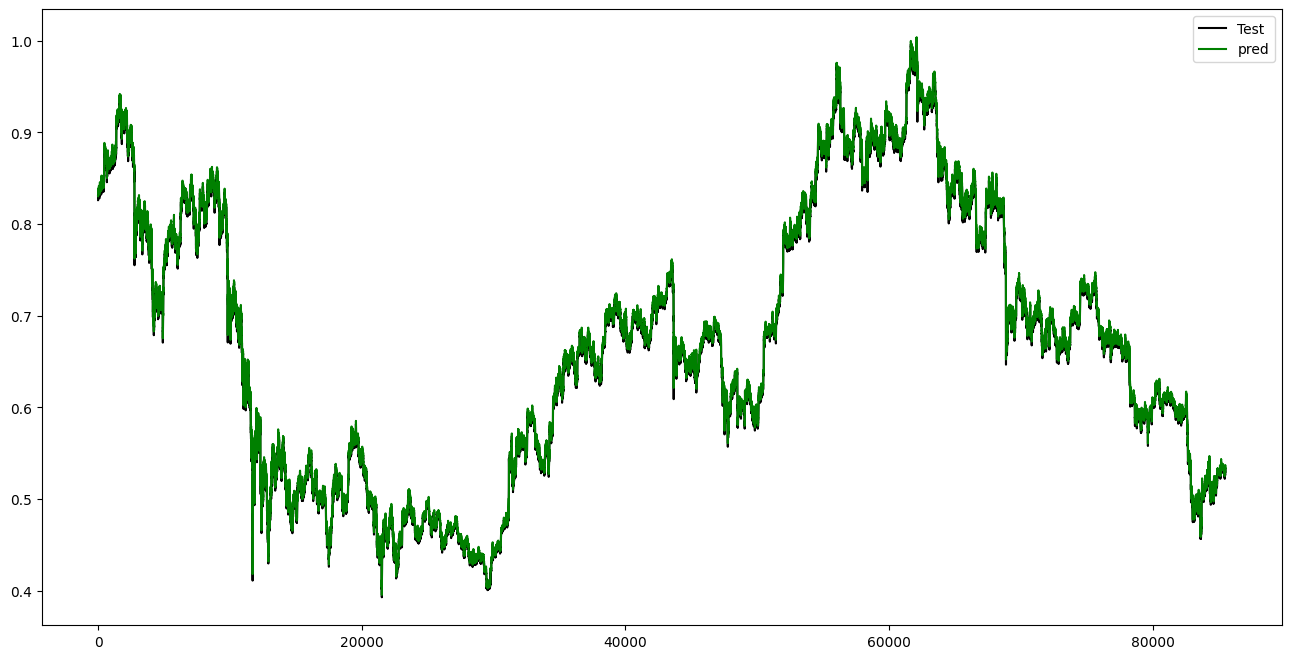

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()


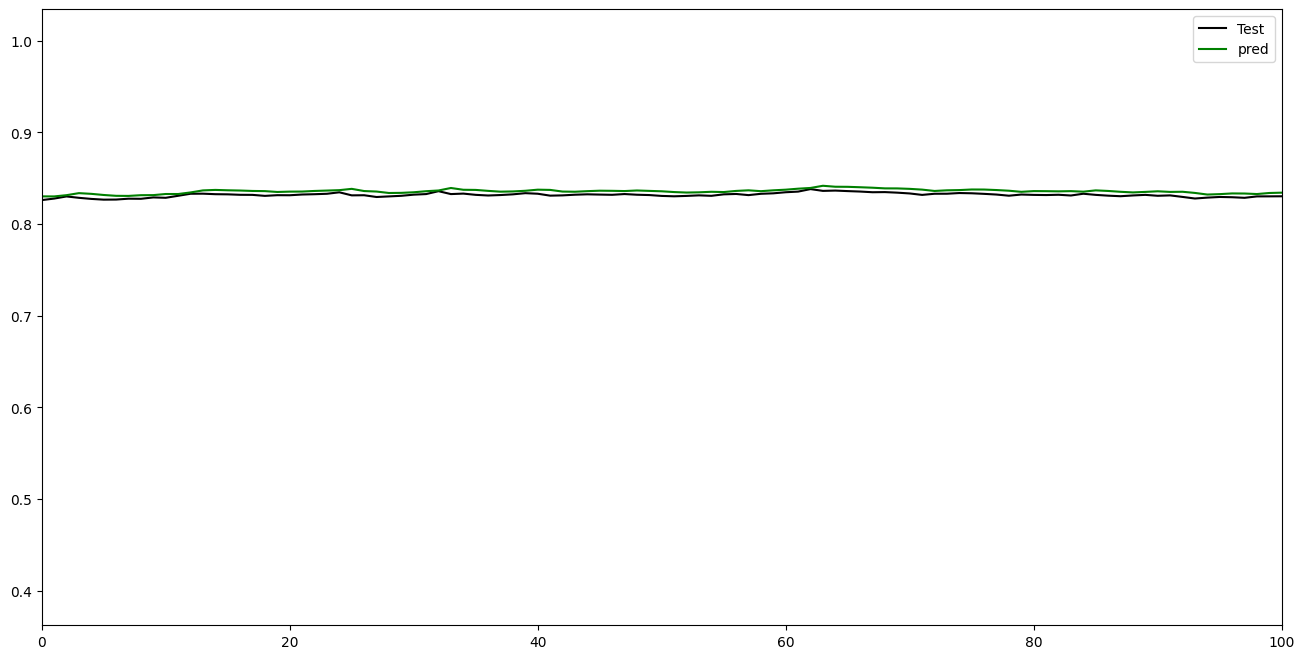

In [ ]:
# prompt: zoom the plot of the above cell

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.xlim([0,100])
plt.show()


In [ ]:
import pickle

In [ ]:
y_pred[0]

array([0.8302553], dtype=float32)

#                                 Mean Reversion

1.   Ratio Calculation
2.   Strategy Returns




## Creating seperate Dataframe for predicted close values

In [ ]:
df4 = pd.DataFrame(y_pred)
df4['PREDICTED CLOSE']=y_pred
df4

,0,PREDICTED CLOSE
0,0.830255,0.830255
1,0.830187,0.830187
2,0.831553,0.831553
3,0.833777,0.833777
4,0.833004,0.833004
...,...,...
85495,0.534877,0.534877
85496,0.533605,0.533605
85497,0.533485,0.533485
85498,0.532617,0.532617


In [ ]:
df4['SMA'] = df4['PREDICTED CLOSE'].rolling(window=288).mean()
df4['EMAF']=ta.ema(df2.close, length=144)
df4

,0,PREDICTED CLOSE,SMA,EMAF
0,0.830255,0.830255,NaN,NaN
1,0.830187,0.830187,NaN,NaN
2,0.831553,0.831553,NaN,NaN
3,0.833777,0.833777,NaN,NaN
4,0.833004,0.833004,NaN,NaN
...,...,...,...,...
85495,0.534877,0.534877,0.533250,6503.757036
85496,0.533605,0.533605,0.533246,6503.654594
85497,0.533485,0.533485,0.533241,6503.575497
85498,0.532617,0.532617,0.533232,6503.437628


In [ ]:
sma_pandas = df2['close'].rolling(window=30).mean()
sma_pandas

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
427521    37779.433333
427522    37790.550667
427523    37803.108333
427524    37816.151333
427525    37828.064667
Name: close, Length: 427526, dtype: float64

## Calculating ratio for df2 and df4 to set strategy

In [ ]:
df4['Ratio']=df4['PREDICTED CLOSE']/df4['SMA']
df4['Ratio1']=df4['PREDICTED CLOSE']/df4['EMAF']

In [ ]:
df2['Ratio']=df2['close']/df2['EMAF']

In [ ]:
#stats of ratio
df2['Ratio'].describe()

count    427526.000000
mean          1.000348
std           0.020031
min           0.632619
25%           0.992776
50%           1.000740
75%           1.008767
max           1.256205
Name: Ratio, dtype: float64

In [ ]:
#donot change
percentiles=[25,50,75,80,85]
ratios=df2['Ratio'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.99277575, 1.00073982, 1.00876682, 1.01161427, 1.01533211])

In [ ]:
averageofhigh = df2[df2['Ratio'] > percentile_values[-1]]['Ratio'].median()
averageofhigh

1.024710260677013

In [ ]:
averageoflow = df2[df2['Ratio'] <percentile_values[0]]['Ratio'].median()
averageoflow

0.9833387865730947

In [ ]:
df4['Ratio'].describe()

count    85213.000000
mean         0.999379
std          0.024640
min          0.713258
25%          0.987909
50%          0.999834
75%          1.013065
max          1.131295
Name: Ratio, dtype: float64

In [ ]:
percentiles1=[25,50,75,80]
ratios1=df4['Ratio'].dropna()
percentile_values1=np.percentile(ratios1,percentiles)
percentile_values1

array([0.9879089 , 0.99983371, 1.01306491, 1.01652319, 1.02077911])

In [ ]:
averageoflow1 = df4[df4['Ratio'] <percentile_values1[0]]['Ratio'].median()
averageoflow1

0.975281996926137

In [ ]:
averageofhigh1 = df4[df4['Ratio'] >percentile_values1[-1]]['Ratio'].median()
averageofhigh1

1.0313241241861997

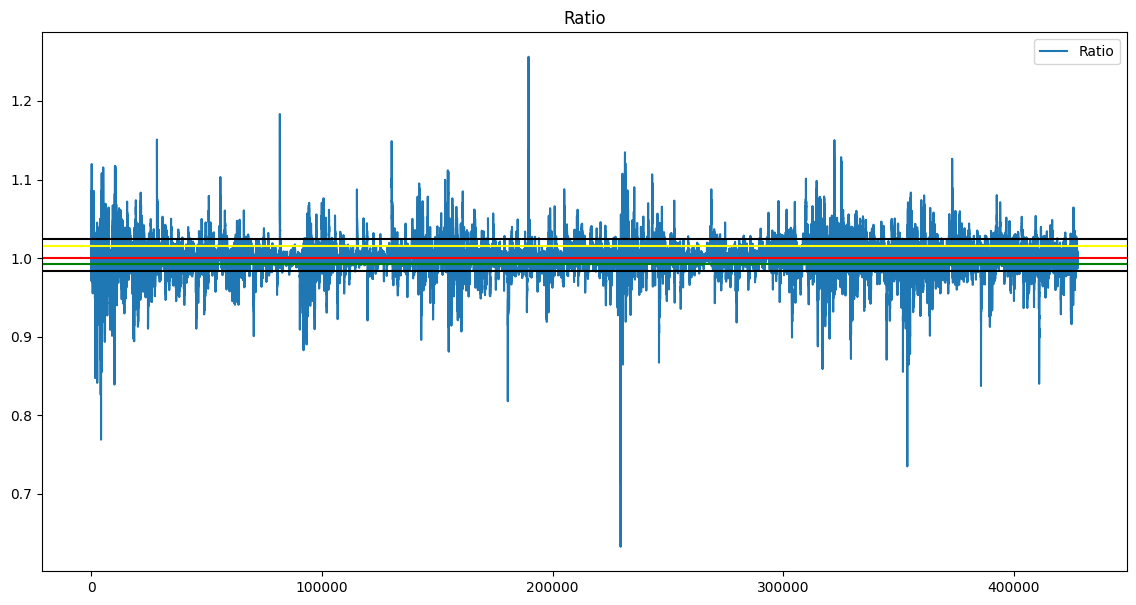

In [ ]:
#ploting ratios
plt.figure(figsize=(14,7))
plt.title('Ratio')
df2['Ratio'].plot(legend=True)
plt.axhline(percentile_values[-1],c='yellow',label='85th percentile')#sell
plt.axhline(averageofhigh,c='black',label='median above 75 percentile')#sell
plt.axhline(percentile_values[1],c='red',label='50th percentile')#hold
plt.axhline(percentile_values[0],c='green',label='15th percentile')#buy
plt.axhline(averageoflow,c='black',label='15th percentile')#buy

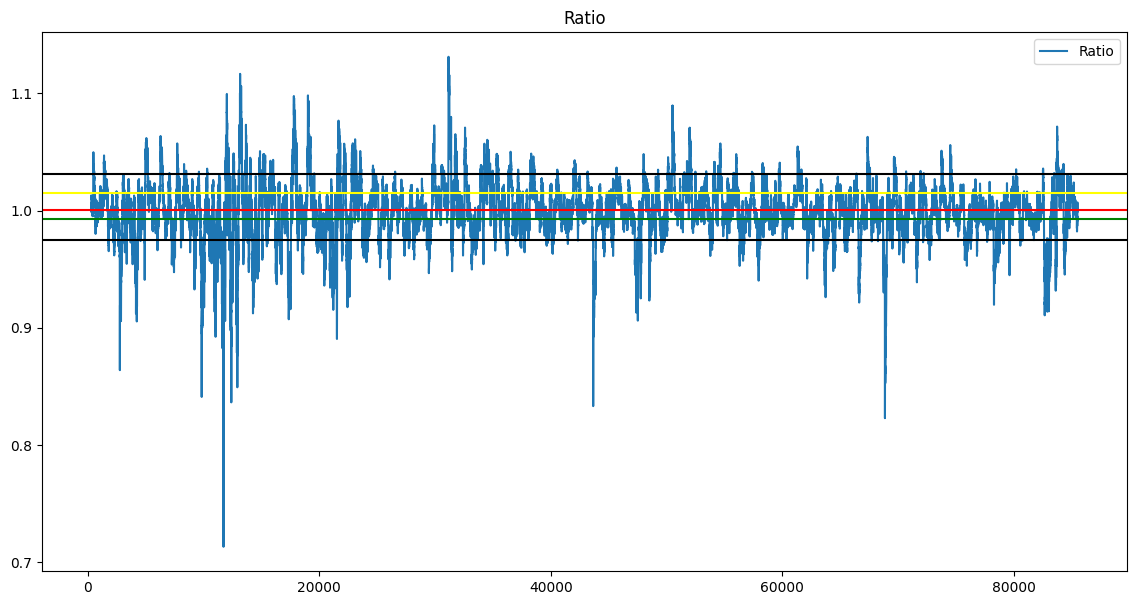

In [ ]:
#ploting ratios
plt.figure(figsize=(14,7))
plt.title('Ratio')
df4['Ratio'].plot(legend=True)
plt.axhline(percentile_values[-1],c='yellow',label='85th percentile')#sell
plt.axhline(averageofhigh1,c='black',label='median above 85 percentile')#sell
plt.axhline(percentile_values[1],c='red',label='50th percentile')#hold
plt.axhline(percentile_values[0],c='green',label='15th percentile')#buy
plt.axhline(averageoflow1,c='black',label='15th percentile')#buy

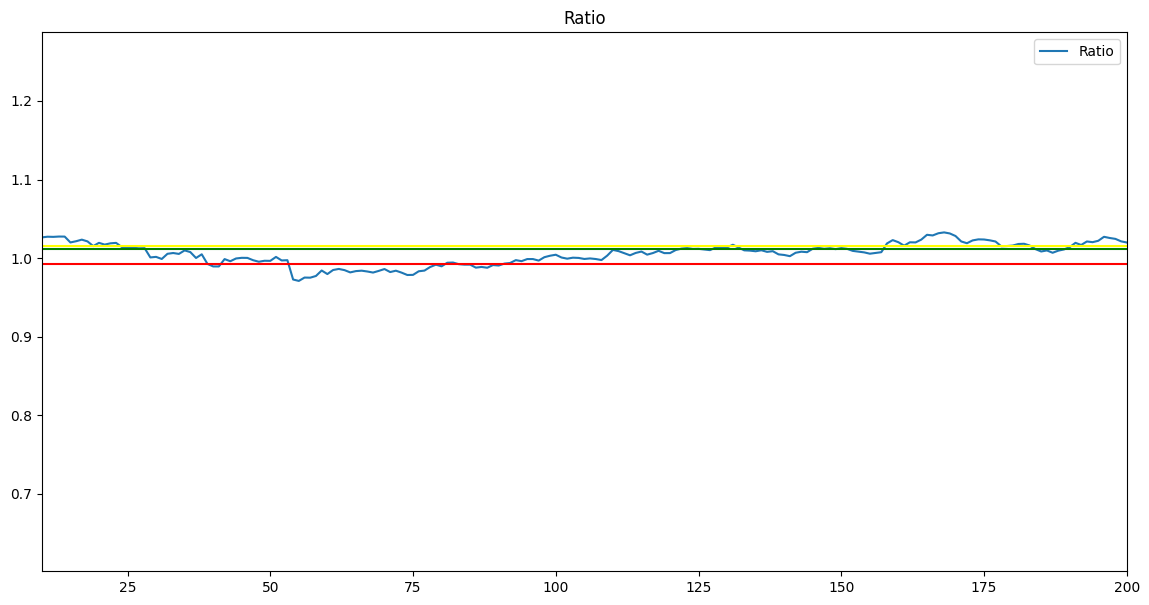

In [ ]:
# a zoom in for the above plot for ratio

plt.figure(figsize=(14,7))
plt.title('Ratio')
df2['Ratio'].plot(legend=True)
plt.xlim([10,200])
plt.axhline(percentile_values[3],c='green',label='50th percentile')
plt.axhline(percentile_values[0],c='red',label='50th percentile')
plt.axhline(percentile_values[-1],c='yellow',label='85th percentile')

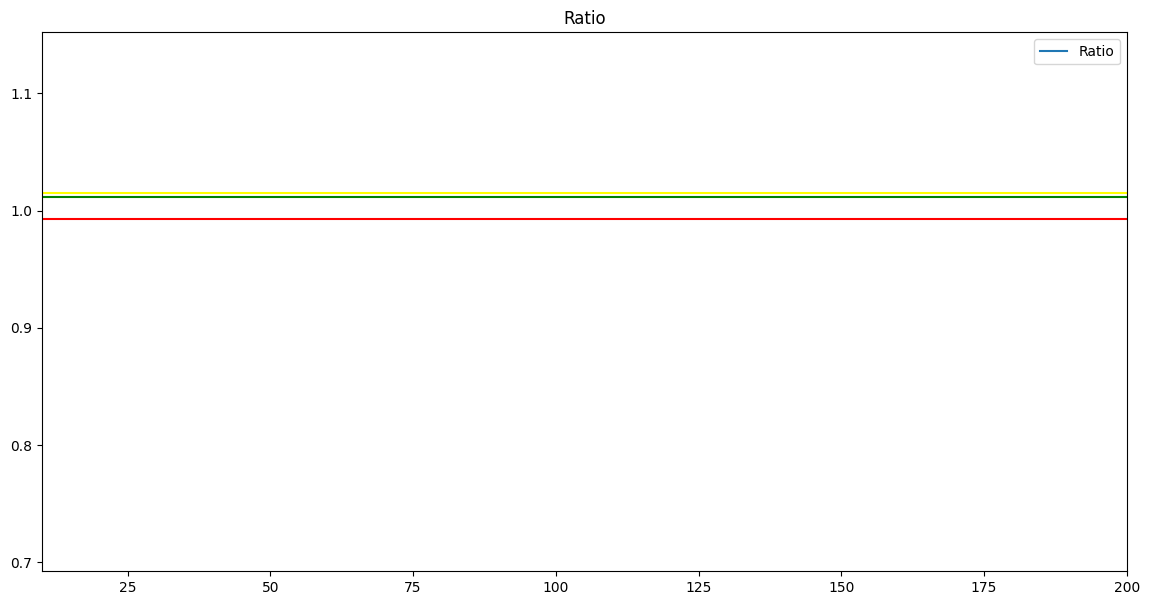

In [ ]:
# a zoom in for the above plot for ratio

plt.figure(figsize=(14,7))
plt.title('Ratio')
df4['Ratio'].plot(legend=True)
plt.xlim([10,200])
plt.axhline(percentile_values[-1],c='yellow',label='85th percentile')#sell
plt.axhline(percentile_values[0],c='red',label='50th percentile')#hold
plt.axhline(percentile_values[3],c='green',label='15th percentile')#buy


## **Setting** signals

In [ ]:
#setting buy sell signals
sell=averageofhigh
buy=averageoflow
df2['Mark']=np.where(df2.Ratio>sell,-1,np.nan)
df2['Mark']=np.where(df2.Ratio<buy,1,df2['Mark'])
df2['Mark'] = df2['Mark'].fillna(0)
#get the buy sell signal
df2['Buy']=np.where(df2.Mark==1,df2['close'],np.nan)
df2['Sell']=np.where(df2.Mark==-1,df2['close'],np.nan)
df2["Hold"]=np.where(df2.Mark==0,df2['close'],np.nan)

In [ ]:
df2

,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close,Target,buy/sell,TargetNextClose,Ratio,Mark,Buy,Sell,Hold
0,13380.00,13395.32,-24.52,-0.182923,42.815597,13364.753090,13351.998498,13340.074775,13404.52,-2.16,0,13380.00,1.001141,0.0,NaN,NaN,13380.00
1,13500.00,13382.16,120.00,0.896861,56.460779,13365.689055,13354.929220,13342.192990,13380.00,0.00,0,13500.00,1.010049,0.0,NaN,NaN,13500.00
2,13516.09,13500.00,16.09,0.119185,57.903832,13366.729892,13358.120523,13344.496262,13500.00,-11.28,0,13516.09,1.011174,0.0,NaN,NaN,13516.09
3,13490.42,13527.37,-25.67,-0.189922,54.799208,13367.585879,13360.740315,13346.429026,13516.09,10.41,1,13490.42,1.009189,0.0,NaN,NaN,13490.42
4,13540.00,13480.01,49.58,0.367520,59.313559,13368.779056,13364.290011,13348.992880,13490.42,-1.71,0,13540.00,1.012808,0.0,NaN,NaN,13540.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427521,37950.58,38040.60,-90.01,-0.236616,56.465811,37863.588022,37804.063510,37833.777027,38040.59,0.03,1,37950.58,1.002298,0.0,NaN,NaN,37950.58
427522,37959.87,37950.55,9.29,0.024479,56.949809,37864.254334,37807.148787,37835.447133,37950.58,0.00,0,37959.87,1.002525,0.0,NaN,NaN,37959.87
427523,37896.41,37959.87,-63.46,-0.167177,52.664532,37864.476864,37808.916336,37836.254588,37959.87,0.00,0,37896.41,1.000843,0.0,NaN,NaN,37896.41
427524,37928.03,37896.41,31.62,0.083438,54.492605,37864.916678,37811.275022,37837.470156,37896.41,-0.01,0,37928.03,1.001667,0.0,NaN,NaN,37928.03


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

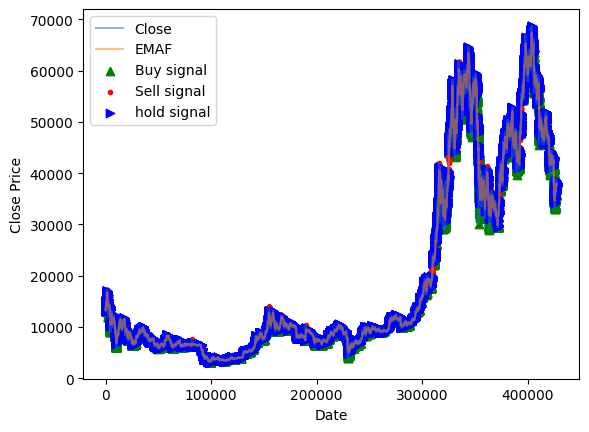

In [ ]:
plt.plot(df2['close'],alpha=0.5,label='Close')
plt.plot(df2['EMAF'],alpha=0.5,label='EMAF')
plt.scatter(df2.index,df2['Buy'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df2.index,df2['Sell'],color='red',label='Sell signal',marker='.',alpha=1)
plt.scatter(df2.index,df2['Hold'],color='blue',label='hold signal',marker='>',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt

## setting for predicted return


In [ ]:
df4

,0,PREDICTED CLOSE,SMA,EMAF,Ratio,Ratio1
0,0.830255,0.830255,NaN,NaN,NaN,NaN
1,0.830187,0.830187,NaN,NaN,NaN,NaN
2,0.831553,0.831553,NaN,NaN,NaN,NaN
3,0.833777,0.833777,NaN,NaN,NaN,NaN
4,0.833004,0.833004,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
85495,0.534877,0.534877,0.533250,6503.757036,1.003051,0.000082
85496,0.533605,0.533605,0.533246,6503.654594,1.000673,0.000082
85497,0.533485,0.533485,0.533241,6503.575497,1.000457,0.000082
85498,0.532617,0.532617,0.533232,6503.437628,0.998847,0.000082


In [ ]:
#setting buy sell signals
sell=percentile_values1[-1]
buy=percentile_values1[0]
df4['Mark']=np.where(df4.Ratio>sell,-1,np.nan)
df4['Mark']=np.where(df4.Ratio<buy,1,df4['Mark'])
df4['Mark'] = df4['Mark'].fillna(0)
#get the buy sell signal
df4['Buy']=np.where(df4.Mark==1,df4['PREDICTED CLOSE'],np.nan)
df4['Sell']=np.where(df4.Mark==-1,df4['PREDICTED CLOSE'],np.nan)
df4["Hold"]=np.where(df4.Mark==0,df4['PREDICTED CLOSE'],np.nan)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


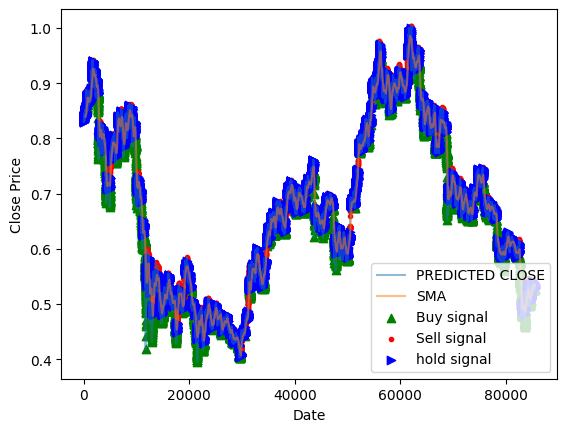

In [ ]:
plt.plot(df4['PREDICTED CLOSE'],alpha=0.5,label='PREDICTED CLOSE')
plt.plot(df4['SMA'],alpha=0.5,label='SMA')
plt.scatter(df4.index,df4['Buy'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df4.index,df4['Sell'],color='red',label='Sell signal',marker='.',alpha=1)
plt.scatter(df4.index,df4['Hold'],color='blue',label='hold signal',marker='>',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt

## Predicting with median values

In [ ]:
#setting buy sell signals
sell=averageofhigh1
buy=averageoflow1
df4['Mark med']=np.where(df4.Ratio>sell,-1,np.nan)
df4['Mark med']=np.where(df4.Ratio<buy,1,df4['Mark med'])
df4['Mark med'] = df4['Mark med'].fillna(0)
#get the buy sell signal
df4['Buy']=np.where(df4.Mark==1,df4['PREDICTED CLOSE'],np.nan)
df4['Sell']=np.where(df4.Mark==-1,df4['PREDICTED CLOSE'],np.nan)
df4["Hold"]=np.where(df4.Mark==0,df4['PREDICTED CLOSE'],np.nan)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


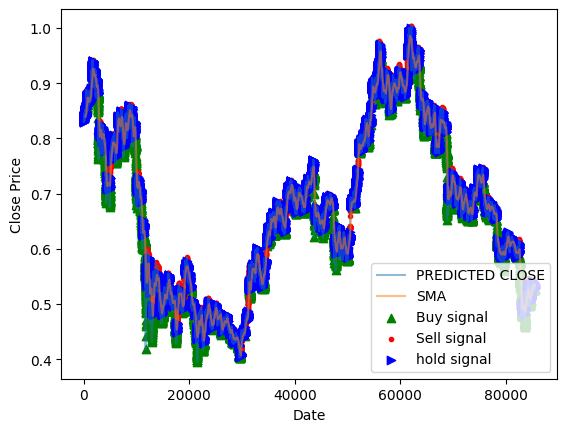

In [ ]:
plt.plot(df4['PREDICTED CLOSE'],alpha=0.5,label='PREDICTED CLOSE')
plt.plot(df4['SMA'],alpha=0.5,label='SMA')
plt.scatter(df4.index,df4['Buy'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df4.index,df4['Sell'],color='red',label='Sell signal',marker='.',alpha=1)
plt.scatter(df4.index,df4['Hold'],color='blue',label='hold signal',marker='>',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt

In [ ]:
df4

,0,PREDICTED CLOSE,SMA,EMAF,Ratio,Ratio1,Mark,Buy,Sell,Hold,Mark med
0,0.830255,0.830255,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.830255,0.0
1,0.830187,0.830187,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.830187,0.0
2,0.831553,0.831553,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.831553,0.0
3,0.833777,0.833777,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.833777,0.0
4,0.833004,0.833004,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.833004,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85495,0.534877,0.534877,0.533250,6503.757036,1.003051,0.000082,0.0,NaN,NaN,0.534877,0.0
85496,0.533605,0.533605,0.533246,6503.654594,1.000673,0.000082,0.0,NaN,NaN,0.533605,0.0
85497,0.533485,0.533485,0.533241,6503.575497,1.000457,0.000082,0.0,NaN,NaN,0.533485,0.0
85498,0.532617,0.532617,0.533232,6503.437628,0.998847,0.000082,0.0,NaN,NaN,0.532617,0.0


In [ ]:
df2['log_returns'] = np.log1p(df2['close'].pct_change())
df4['log_returns'] = np.log1p(df4['PREDICTED CLOSE'].pct_change())
#or use the below
#df2['sr']=df2.pct_change(1)['close']
#df2['lod']=np.log(1 +df2['sr'])

In [ ]:
df2['Strategy_Returns']=df2.Mark.shift(1)*df2.log_returns
df2['Strategy_Returns']

0         NaN
1         0.0
2         0.0
3        -0.0
4         0.0
         ... 
427521   -0.0
427522    0.0
427523   -0.0
427524    0.0
427525   -0.0
Name: Strategy_Returns, Length: 427526, dtype: float64

In [ ]:
df4['Strategy_Returns']=df4.Mark.shift(1)*df4.log_returns
df4['Strategy_Returns']

0        NaN
1       -0.0
2        0.0
3        0.0
4       -0.0
        ... 
85495   -0.0
85496   -0.0
85497   -0.0
85498   -0.0
85499    0.0
Name: Strategy_Returns, Length: 85500, dtype: float64

In [ ]:
df2['buy hold']=np.log(df2.close.div(df2.close.shift(1)))
df2['strategy']=df2['buy hold']*df2['Mark'].shift(1)

In [ ]:
#comparing returns of strategy with traditional buy and hold
print("Returns percentage")
df2[['buy hold','strategy']].sum()*100

Returns percentage


buy hold    104.070868
strategy    114.083614
dtype: float64

#Metrics
Calculating metrics and improving them with risk management techniques

In [ ]:
df2

,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close,Target,...,TargetNextClose,Ratio,Mark,Buy,Sell,Hold,log_returns,Strategy_Returns,buy hold,strategy
0,13380.00,13395.32,-24.52,-0.182923,42.815597,13364.753090,13351.998498,13340.074775,13404.52,-2.16,...,13380.00,1.001141,0.0,NaN,NaN,13380.00,NaN,NaN,NaN,NaN
1,13500.00,13382.16,120.00,0.896861,56.460779,13365.689055,13354.929220,13342.192990,13380.00,0.00,...,13500.00,1.010049,0.0,NaN,NaN,13500.00,0.008929,0.0,0.008929,0.0
2,13516.09,13500.00,16.09,0.119185,57.903832,13366.729892,13358.120523,13344.496262,13500.00,-11.28,...,13516.09,1.011174,0.0,NaN,NaN,13516.09,0.001191,0.0,0.001191,0.0
3,13490.42,13527.37,-25.67,-0.189922,54.799208,13367.585879,13360.740315,13346.429026,13516.09,10.41,...,13490.42,1.009189,0.0,NaN,NaN,13490.42,-0.001901,-0.0,-0.001901,-0.0
4,13540.00,13480.01,49.58,0.367520,59.313559,13368.779056,13364.290011,13348.992880,13490.42,-1.71,...,13540.00,1.012808,0.0,NaN,NaN,13540.00,0.003668,0.0,0.003668,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427521,37950.58,38040.60,-90.01,-0.236616,56.465811,37863.588022,37804.063510,37833.777027,38040.59,0.03,...,37950.58,1.002298,0.0,NaN,NaN,37950.58,-0.002369,-0.0,-0.002369,-0.0
427522,37959.87,37950.55,9.29,0.024479,56.949809,37864.254334,37807.148787,37835.447133,37950.58,0.00,...,37959.87,1.002525,0.0,NaN,NaN,37959.87,0.000245,0.0,0.000245,0.0
427523,37896.41,37959.87,-63.46,-0.167177,52.664532,37864.476864,37808.916336,37836.254588,37959.87,0.00,...,37896.41,1.000843,0.0,NaN,NaN,37896.41,-0.001673,-0.0,-0.001673,-0.0
427524,37928.03,37896.41,31.62,0.083438,54.492605,37864.916678,37811.275022,37837.470156,37896.41,-0.01,...,37928.03,1.001667,0.0,NaN,NaN,37928.03,0.000834,0.0,0.000834,0.0


In [ ]:
dfbuff

,index,datetime,close,open,Diff,%change,RSI,EMAF,EMAM,EMAS,Adj_close,Target,buy/sell,TargetNextClose
0,287,2018-01-02 05:25:00,13380.00,13395.32,-24.52,-0.182923,42.815597,13364.753090,13351.998498,13340.074775,13404.52,-2.16,0,13380.00
1,288,2018-01-02 05:30:00,13500.00,13382.16,120.00,0.896861,56.460779,13365.689055,13354.929220,13342.192990,13380.00,0.00,0,13500.00
2,289,2018-01-02 05:35:00,13516.09,13500.00,16.09,0.119185,57.903832,13366.729892,13358.120523,13344.496262,13500.00,-11.28,0,13516.09
3,290,2018-01-02 05:40:00,13490.42,13527.37,-25.67,-0.189922,54.799208,13367.585879,13360.740315,13346.429026,13516.09,10.41,1,13490.42
4,291,2018-01-02 05:45:00,13540.00,13480.01,49.58,0.367520,59.313559,13368.779056,13364.290011,13348.992880,13490.42,-1.71,0,13540.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427521,427808,2022-01-31 05:05:00,37950.58,38040.60,-90.01,-0.236616,56.465811,37863.588022,37804.063510,37833.777027,38040.59,0.03,1,37950.58
427522,427809,2022-01-31 05:10:00,37959.87,37950.55,9.29,0.024479,56.949809,37864.254334,37807.148787,37835.447133,37950.58,0.00,0,37959.87
427523,427810,2022-01-31 05:15:00,37896.41,37959.87,-63.46,-0.167177,52.664532,37864.476864,37808.916336,37836.254588,37959.87,0.00,0,37896.41
427524,427811,2022-01-31 05:20:00,37928.03,37896.41,31.62,0.083438,54.492605,37864.916678,37811.275022,37837.470156,37896.41,-0.01,0,37928.03


In [ ]:
df_metrics=pd.DataFrame()

In [ ]:
dt_ind = pd.to_datetime(dfbuff.datetime)
dt_ind

0        2018-01-02 05:25:00
1        2018-01-02 05:30:00
2        2018-01-02 05:35:00
3        2018-01-02 05:40:00
4        2018-01-02 05:45:00
                 ...        
427521   2022-01-31 05:05:00
427522   2022-01-31 05:10:00
427523   2022-01-31 05:15:00
427524   2022-01-31 05:20:00
427525   2022-01-31 05:25:00
Name: datetime, Length: 427526, dtype: datetime64[ns]

In [ ]:
df2.close.count()

427526

In [ ]:
df2['buy hold']=np.log(df2.close.div(df2.close.shift(1)))
df2['strategy']=df2['buy hold']*df2['Mark'].shift(1)

In [ ]:
df2[['buy hold','strategy']].sum()

buy hold    1.040709
strategy    1.140836
dtype: float64

In [ ]:
#what $1 will be after trading
df2[['buy hold','strategy']].sum().apply(np.exp)

buy hold    2.831223
strategy    3.129384
dtype: float64

In [ ]:
#Gross Profit
input_dollars = 1000
total = df2[['buy hold','strategy']].sum().apply(np.exp)*input_dollars
print(f"Gross Profit on {input_dollars} dollars")
total-input_dollars

Gross Profit on 1000 dollars


buy hold    1831.222720
strategy    2129.383867
dtype: float64

In [ ]:
#drawdowns
Roll_max = df2['close'].rolling(window=144).max()
drawdown = df2['close']/Roll_max - 1
max_drawdown = drawdown.rolling(window=144).min()
max_drawdown

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
427521   -0.021223
427522   -0.021223
427523   -0.021223
427524   -0.021223
427525   -0.021223
Name: close, Length: 427526, dtype: float64

In [ ]:
#maximum drawdowns
max_drawdown.mul(100).max()

-0.3159478592186349

In [ ]:
#Total executed trades
chk=[0]
executed_trd = df2["Mark"].isin(chk).value_counts()
print(f"total closed trades are {executed_trd[1]}")

total closed trades are 85505


In [ ]:
#number of winning trades
xy = np.where((df2["strategy"]>0) & df2["Mark"]!=0)
#df2.loc[xy]
len(df2.loc[xy])

37871

In [ ]:
#number of losing trades
xyz = np.where((df2["strategy"]<0) & df2["Mark"]!=0)
#df2.loc[xy]
len(df2.loc[xyz])

42036

In [ ]:
#average winning trade returns
(df2.strategy.loc[xy].sum()/len(df2.loc[xy]))*100

0.257188491932637

In [ ]:
df2.strategy.loc[xyz].sum()

-116.6234512280663

In [ ]:
#average losing trade returns
(df2.strategy.loc[xyz].sum()/len(df2.loc[xyz]))*100

-0.2774370806643503

In [ ]:
mean2 = df2['strategy'].mean()
std2 = df2['strategy'].std()

In [ ]:
#calculating the sharpe ratio
risk_free_rate = 0.05/360 # Example risk-free rate of 5%
sharpe = (mean2-risk_free_rate)/std2
print(sharpe)

-0.06796354908674446


In [ ]:
def downwarddeviation(r):
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [ ]:
std_down = downwarddeviation(df2["strategy"])*100

In [ ]:
#sortino ratio
risk_free_rate2 = 0.05 # Example risk-free rate of 5%
sortino = (mean2-risk_free_rate2)/std_down
print(sortino)

-0.13835071012696395


In [ ]:
#returns with dollars88888888888888888
input_doll = 1000
df2[['buy hold','strategy']].sum().apply(np.exp)*1000


buy hold    2831.222720
strategy    3129.383867
dtype: float64

In [ ]:
dt_index=pd.to_datetime(df.datetime)
dt_index

0        2018-01-01 05:30:00
1        2018-01-01 05:35:00
2        2018-01-01 05:40:00
3        2018-01-01 05:45:00
4        2018-01-01 05:50:00
                 ...        
427809   2022-01-31 05:10:00
427810   2022-01-31 05:15:00
427811   2022-01-31 05:20:00
427812   2022-01-31 05:25:00
427813   2022-01-31 05:30:00
Name: datetime, Length: 427814, dtype: datetime64[ns]

In [ ]:
df5=pd.DataFrame()
df4

,0,PREDICTED CLOSE,SMA,EMAF,Ratio,Ratio1,Mark,Buy,Sell,Hold,Mark med,log_returns,Strategy_Returns,buy hold,strategy
0,0.830255,0.830255,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.830255,0.0,NaN,NaN,NaN,NaN
1,0.830187,0.830187,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.830187,0.0,-0.000082,-0.0,-0.186022,-0.0
2,0.831553,0.831553,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.831553,0.0,0.001644,0.0,-0.186104,-0.0
3,0.833777,0.833777,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.833777,0.0,0.002671,0.0,-0.184460,-0.0
4,0.833004,0.833004,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.833004,0.0,-0.000928,-0.0,-0.181789,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85495,0.534877,0.534877,0.533250,6503.757036,1.003051,0.000082,0.0,NaN,NaN,0.534877,0.0,-0.000509,-0.0,-0.625210,-0.0
85496,0.533605,0.533605,0.533246,6503.654594,1.000673,0.000082,0.0,NaN,NaN,0.533605,0.0,-0.002380,-0.0,-0.625719,-0.0
85497,0.533485,0.533485,0.533241,6503.575497,1.000457,0.000082,0.0,NaN,NaN,0.533485,0.0,-0.000224,-0.0,-0.628100,-0.0
85498,0.532617,0.532617,0.533232,6503.437628,0.998847,0.000082,0.0,NaN,NaN,0.532617,0.0,-0.001629,-0.0,-0.628324,-0.0


In [ ]:
risk_free_rate = 0.02 # Example risk-free rate of 2%

# Calculate the Sharpe Ratio
sharpe_ratio = (df4['strategy'].mean() - risk_free_rate) / df4['strategy'].std()

# Print the Sharpe Ratio
print(sharpe_ratio)

-0.22699578582121605


In [ ]:
df5["dt_index"] = dt_index
df5["strategy"] = df4.strategy
df5

,dt_index,strategy
0,2018-01-01 05:30:00,NaN
1,2018-01-01 05:35:00,-0.0
2,2018-01-01 05:40:00,-0.0
3,2018-01-01 05:45:00,-0.0
4,2018-01-01 05:50:00,-0.0
...,...,...
427809,2022-01-31 05:10:00,NaN
427810,2022-01-31 05:15:00,NaN
427811,2022-01-31 05:20:00,NaN
427812,2022-01-31 05:25:00,NaN


In [ ]:
#mean rev cummulative return
net_return = np.prod(np.exp(df2['Strategy_Returns'].dropna())) - 1
net_return

2.1293838668414895

In [ ]:
#return for pred close put df2in mark
df2['Strategy_Returns']=df2.Mark.shift(1)*df2.log_returns
df2['Strategy_Returns']
net_return1 = np.prod(np.exp(df2['Strategy_Returns'].dropna())) - 1
net_return1

2.1293838668414895